In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('E:\\备份\\训练数据汇总(8W)\\2019_4_10.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

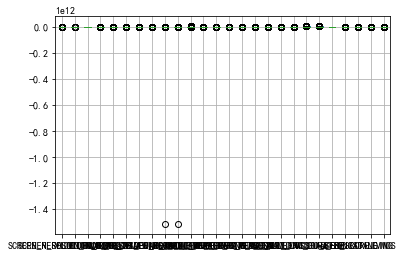

In [10]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号 
plt.figure() #建立图像 
p = data.boxplot() #画箱线图，直接使用DataFrame的方法 
plt.show() #展示箱线图

In [16]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [17]:
head = data.columns.values.tolist()

In [19]:
from collections import Counter
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(data,2,head)

In [25]:
type(Outliers_to_drop)

list

In [26]:
data_1 = data.drop(Outliers_to_drop)

In [27]:
data_1.shape

(50020, 26)

In [30]:
data_1.to_csv('E:\\备份\\训练数据汇总(8W)\\2019_4_10_exception_delete.csv')

In [32]:
data_2 = data_1.drop_duplicates()

In [33]:
data_2.shape

(49968, 26)

In [34]:
data_2.to_csv('E:\\备份\\训练数据汇总(8W)\\2019_4_10_drop_duplicate.csv')